In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import  os

In [2]:
os.chdir(r"/Users/vipinchaudhary/Downloads")

In [3]:
data=pd.read_excel("bank.xlsx",sheet_name="bank")

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
banks=data.copy()

In [6]:
banks["job"]=banks["job"].replace(["management","admin."],"White-collar")
banks["job"]=banks["job"].replace(["services","housemaid"],"Pink-collar")
banks["job"]=banks["job"].replace(["retired","student","unemployed","unknown"],"others")
banks["job"]=banks["job"].replace(["self-employed","entrepreneur"],"self-depend")

<AxesSubplot:>

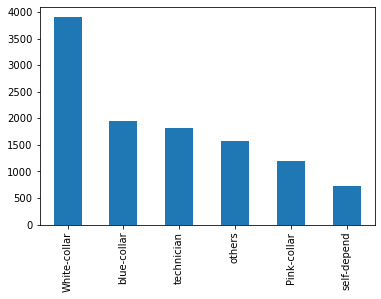

In [7]:
banks["job"].value_counts().plot(kind="bar")

In [8]:
banks["job"].unique()

array(['White-collar', 'technician', 'Pink-collar', 'others',
       'blue-collar', 'self-depend'], dtype=object)

In [9]:
banks["marital"].value_counts(dropna=False)

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [10]:
bank_dic=pd.read_excel("bank.xlsx",sheet_name="Data Dictionary")

In [11]:
banks["education"].value_counts(dropna=False)

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [12]:
banks["default"].value_counts(dropna=False)
banks["default_"]=banks["default"].map({"yes":1,"no":0})
banks.drop(columns=["default"], inplace=True)

In [13]:
banks["housing"].value_counts(dropna=False)
banks["housing"]=banks["housing"].map({"yes":1,"no":0})

In [14]:
banks["loan"].value_counts(dropna=False)
banks["loan"]=banks["loan"].map({"yes":1,"no":0})

In [15]:
banks["contact"].value_counts(dropna=False)

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [16]:
banks.drop(columns=["contact"],inplace=True)

In [17]:
banks["day"].value_counts(dropna=False)

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

In [18]:
def my_day(x):
    if x<=7:
        return "Start_of_Month"
    elif x>7 and x<=25:
        return "mid_of_the_Month"
    elif x>25:
        return "End_of_Month"
    else:
        return "unkown"

In [19]:
banks["day"]=banks["day"].apply(my_day)

In [20]:
banks["day"].value_counts()

mid_of_the_Month    6740
Start_of_Month      2470
End_of_Month        1952
Name: day, dtype: int64

In [21]:
def my_q(x):
    if x in ["jan","feb","mar"]:
        return "q1"
    elif x in ["apr","may","jun"]:
        return "q2"
    elif x in ["jul","aug","sep"]:
        return "q3"
    elif x in ["oct","nov","dec"]:
        return "q4"
    else:
        return "unkown"

In [22]:
banks["quarter"]=banks["month"].apply(my_q)
banks.drop(columns=["month"], inplace=True)

In [23]:
banks["poutcome"].value_counts(dropna=False)

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [24]:
banks["quarter"].value_counts(dropna=False)

q2    4969
q3    3352
q4    1445
q1    1396
Name: quarter, dtype: int64

In [25]:
banks["poutcome"]=banks["poutcome"].replace(["unknown","other"],"unknown")

In [26]:
banks["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [27]:
banks["deposit"]=banks["deposit"].map({"yes":1,"no":0})

In [28]:
banks.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, .1, .25,.5,.75, .9,.95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,11162.0,41.231948,11.913369,18.0,22.0,24.0,25.0,25.00,26.00,28.0,32.0,39.0,49.00,58.0,61.00,64.00,68.00,72.00,77.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,-522.0,-367.0,-244.0,-147.36,-54.95,0.0,122.0,550.0,1708.00,3897.6,6026.45,6987.48,8090.36,10086.00,13226.98,81204.0
housing,11162.0,0.473123,0.499299,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
loan,11162.0,0.130801,0.337198,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
duration,11162.0,371.993818,347.128386,2.0,14.0,23.0,34.0,44.00,51.00,77.0,138.0,255.0,496.00,838.0,1079.90,1148.00,1236.17,1372.34,1577.17,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.0,2.0,3.00,5.0,7.00,8.00,8.00,10.00,13.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0,-1.0,20.75,191.0,326.00,343.00,355.00,369.00,425.39,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,1.00,3.0,5.00,5.00,6.00,7.00,10.00,58.0
deposit,11162.0,0.473840,0.499338,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
default_,11162.0,0.015051,0.121761,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1.00,1.0


In [29]:
banks.drop(columns=["default_"],inplace=True)

## Bivariate Analysis

<AxesSubplot:xlabel='age', ylabel='balance'>

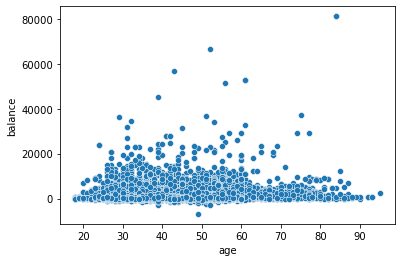

In [30]:
import seaborn as sns
sns.scatterplot(x="age",y="balance",data=banks)

<AxesSubplot:xlabel='age', ylabel='duration'>

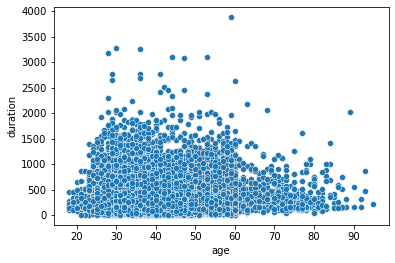

In [31]:
sns.scatterplot(x="age",y="duration",data=banks)

<AxesSubplot:xlabel='duration', ylabel='balance'>

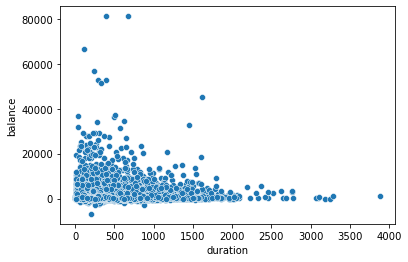

In [32]:
sns.scatterplot(x="duration",y="balance",data=banks)

## cat-num

In [33]:
banks.groupby(["job"])["age"].mean()

job
Pink-collar     40.271512
White-collar    39.929487
blue-collar     39.505144
others          49.976358
self-depend     41.186903
technician      39.001646
Name: age, dtype: float64

In [34]:
banks.groupby(["job"]).agg({"age":["min","mean","max"]})

age               
             min       mean max
job                            
Pink-collar   21  40.271512  82
White-collar  20  39.929487  78
blue-collar   20  39.505144  63
others        18  49.976358  95
self-depend   21  41.186903  84
technician    21  39.001646  71

In [35]:
banks.groupby(["job"]).agg({"balance":["min","mean","max"]})

balance                    
                 min         mean    max
job                                     
Pink-collar    -1531  1146.406850  26965
White-collar   -6847  1589.186410  56831
blue-collar    -1489  1203.926440  66653
others         -1206  1933.827476  81204
self-depend    -3058  1756.443383  52587
technician     -1944  1556.294569  45248

## cat-cat
chisque karna he

<AxesSubplot:>

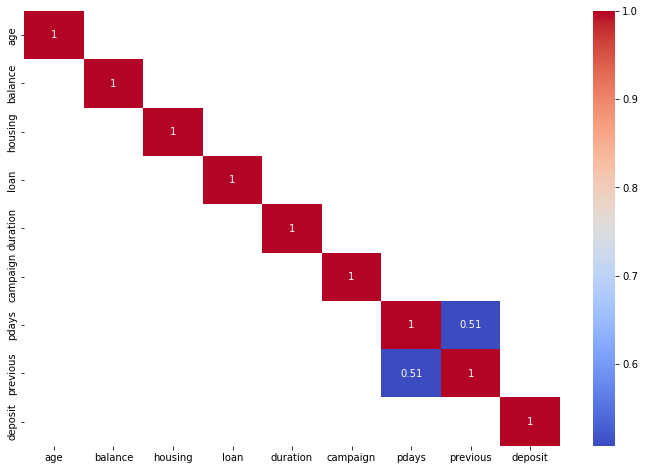

In [36]:
plt.figure(figsize=(12,8))
cr=banks.corr()

cr1=cr[abs(cr) >=.5]
sns.heatmap(cr1,annot=True,cmap="coolwarm")

In [37]:
banks_dummy=pd.get_dummies(data=banks)

In [38]:
banks_dummy.isnull().sum()

age                     0
balance                 0
housing                 0
loan                    0
duration                0
campaign                0
pdays                   0
previous                0
deposit                 0
job_Pink-collar         0
job_White-collar        0
job_blue-collar         0
job_others              0
job_self-depend         0
job_technician          0
marital_divorced        0
marital_married         0
marital_single          0
education_primary       0
education_secondary     0
education_tertiary      0
education_unknown       0
day_End_of_Month        0
day_Start_of_Month      0
day_mid_of_the_Month    0
poutcome_failure        0
poutcome_success        0
poutcome_unknown        0
quarter_q1              0
quarter_q2              0
quarter_q3              0
quarter_q4              0
dtype: int64

## outliners

In [39]:
# Outlier capping Method-I ( PercentileMethod)
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    return x 

In [40]:
banks_dummy=banks_dummy.apply(outlier_capping)

In [41]:
banks_dummy["balance"]=np.where(banks_dummy["balance"]>0,banks_dummy["balance"],0)

In [42]:
banks_dummy["balance"].min()

0.0

## modeling part

In [43]:
y=banks_dummy["deposit"]
x=banks_dummy.drop(columns=["deposit"])

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [45]:
dt1=DecisionTreeClassifier()

In [46]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
print("Train accuracy",dt1.score(x_train,y_train))
print("Test accuracy",dt1.score(x_test,y_test))

Train accuracy 1.0
Test accuracy 0.743505524037026


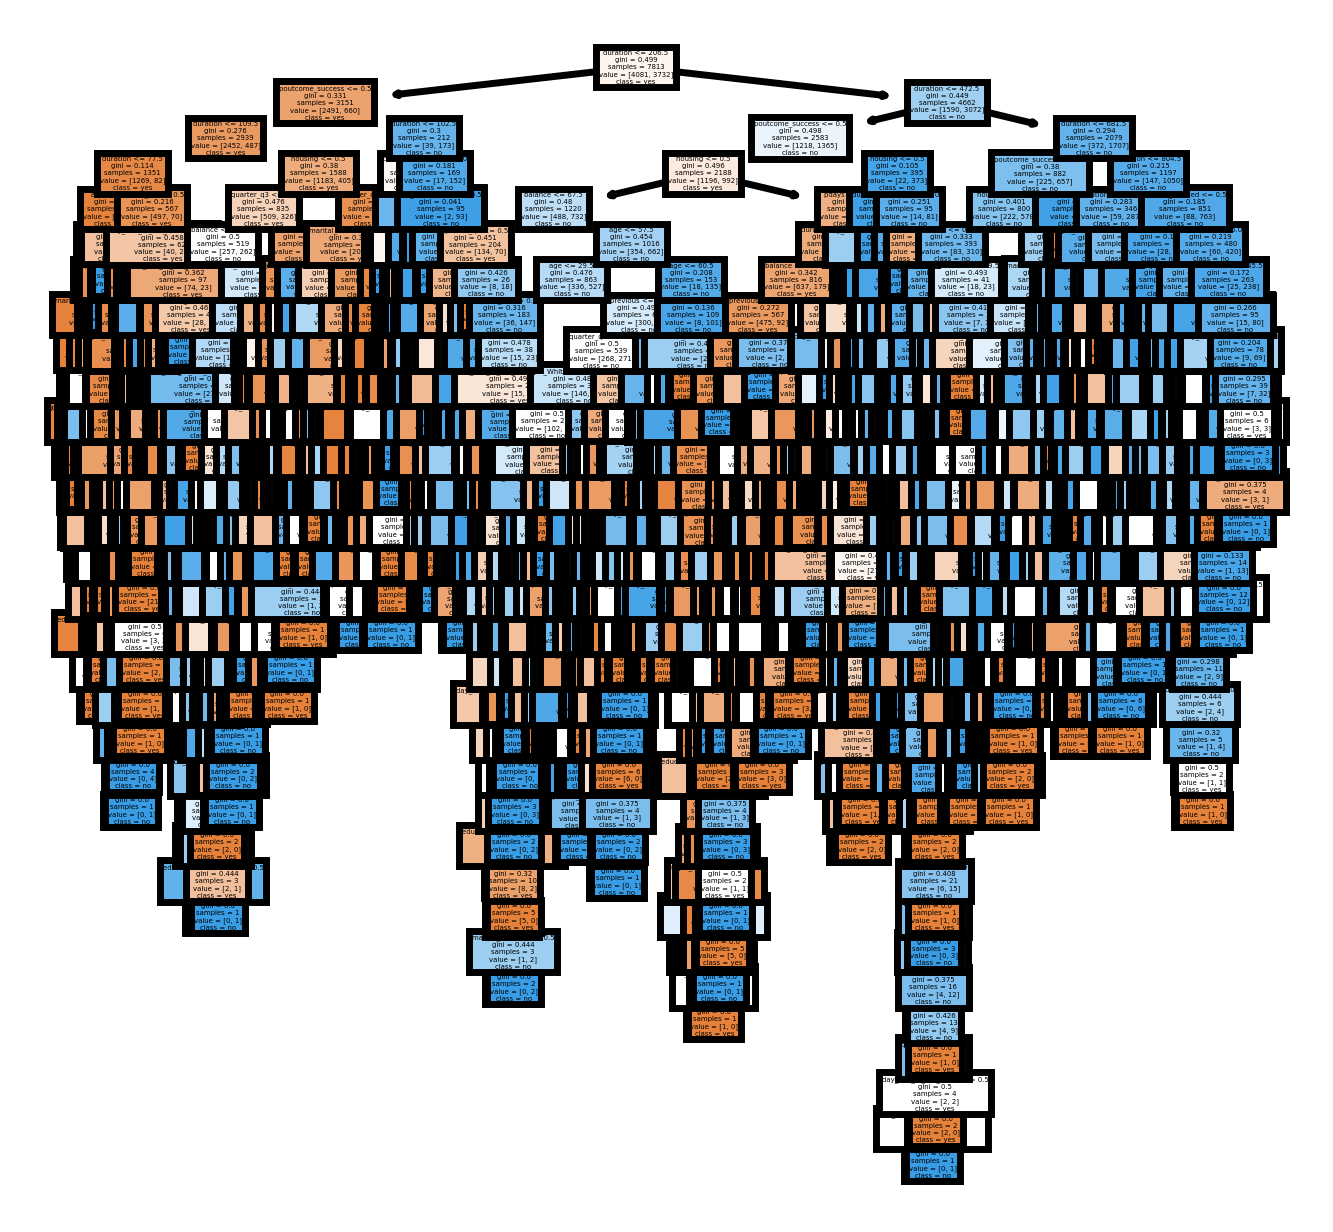

In [48]:
from sklearn.tree import plot_tree

fn=x_train.columns

cn=["yes","no"]

# setting dpi = 300 to make image clearer than defalut
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=500)

plot_tree(dt1,
          feature_names=fn,
          class_names=cn,
          filled=True);

Train accuracy 0.7874056060412133
Test accuracy 0.787996416840848


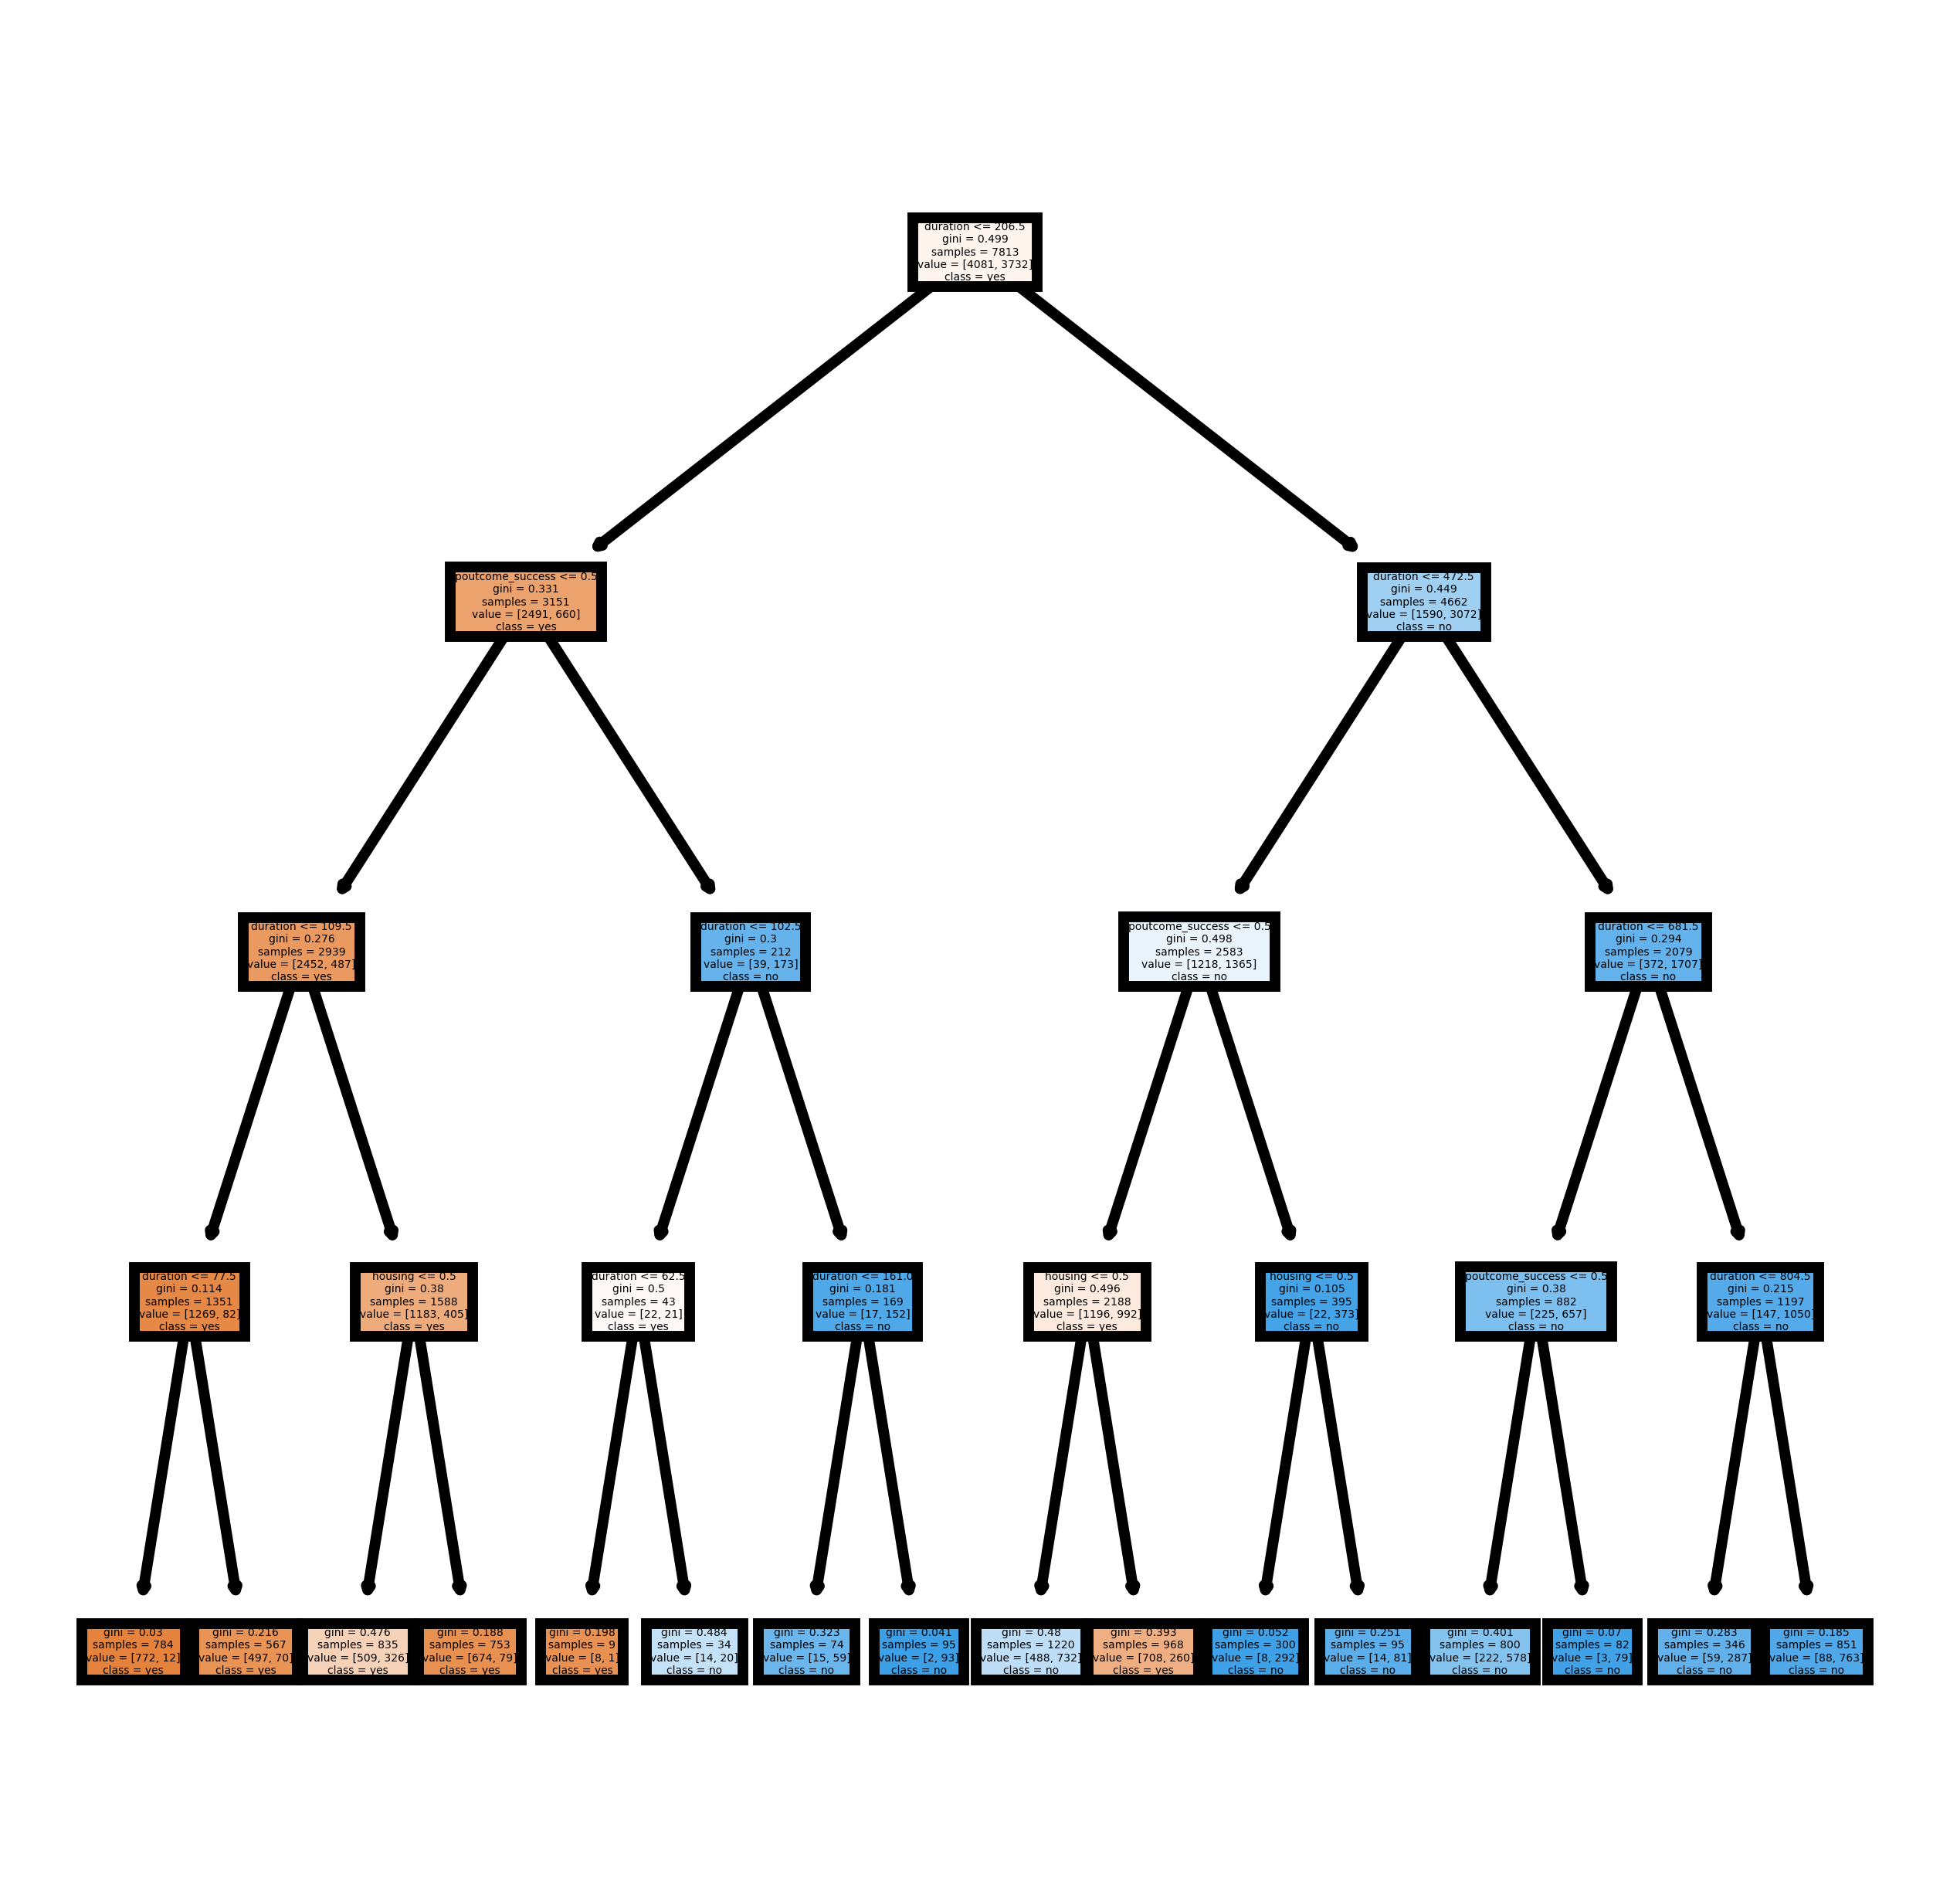

In [49]:
dt2=DecisionTreeClassifier(max_depth=4)
dt2.fit(x_train,y_train)
print("Train accuracy",dt2.score(x_train,y_train))
print("Test accuracy",dt2.score(x_test,y_test))

fn=x_train.columns

cn=["yes","no"]

# setting dpi = 300 to make image clearer than defalut
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=1000)

plot_tree(dt2,
          feature_names=fn,
          class_names=cn,
          filled=True);

Train accuracy 0.8127479841290157
Test accuracy 0.7969543147208121


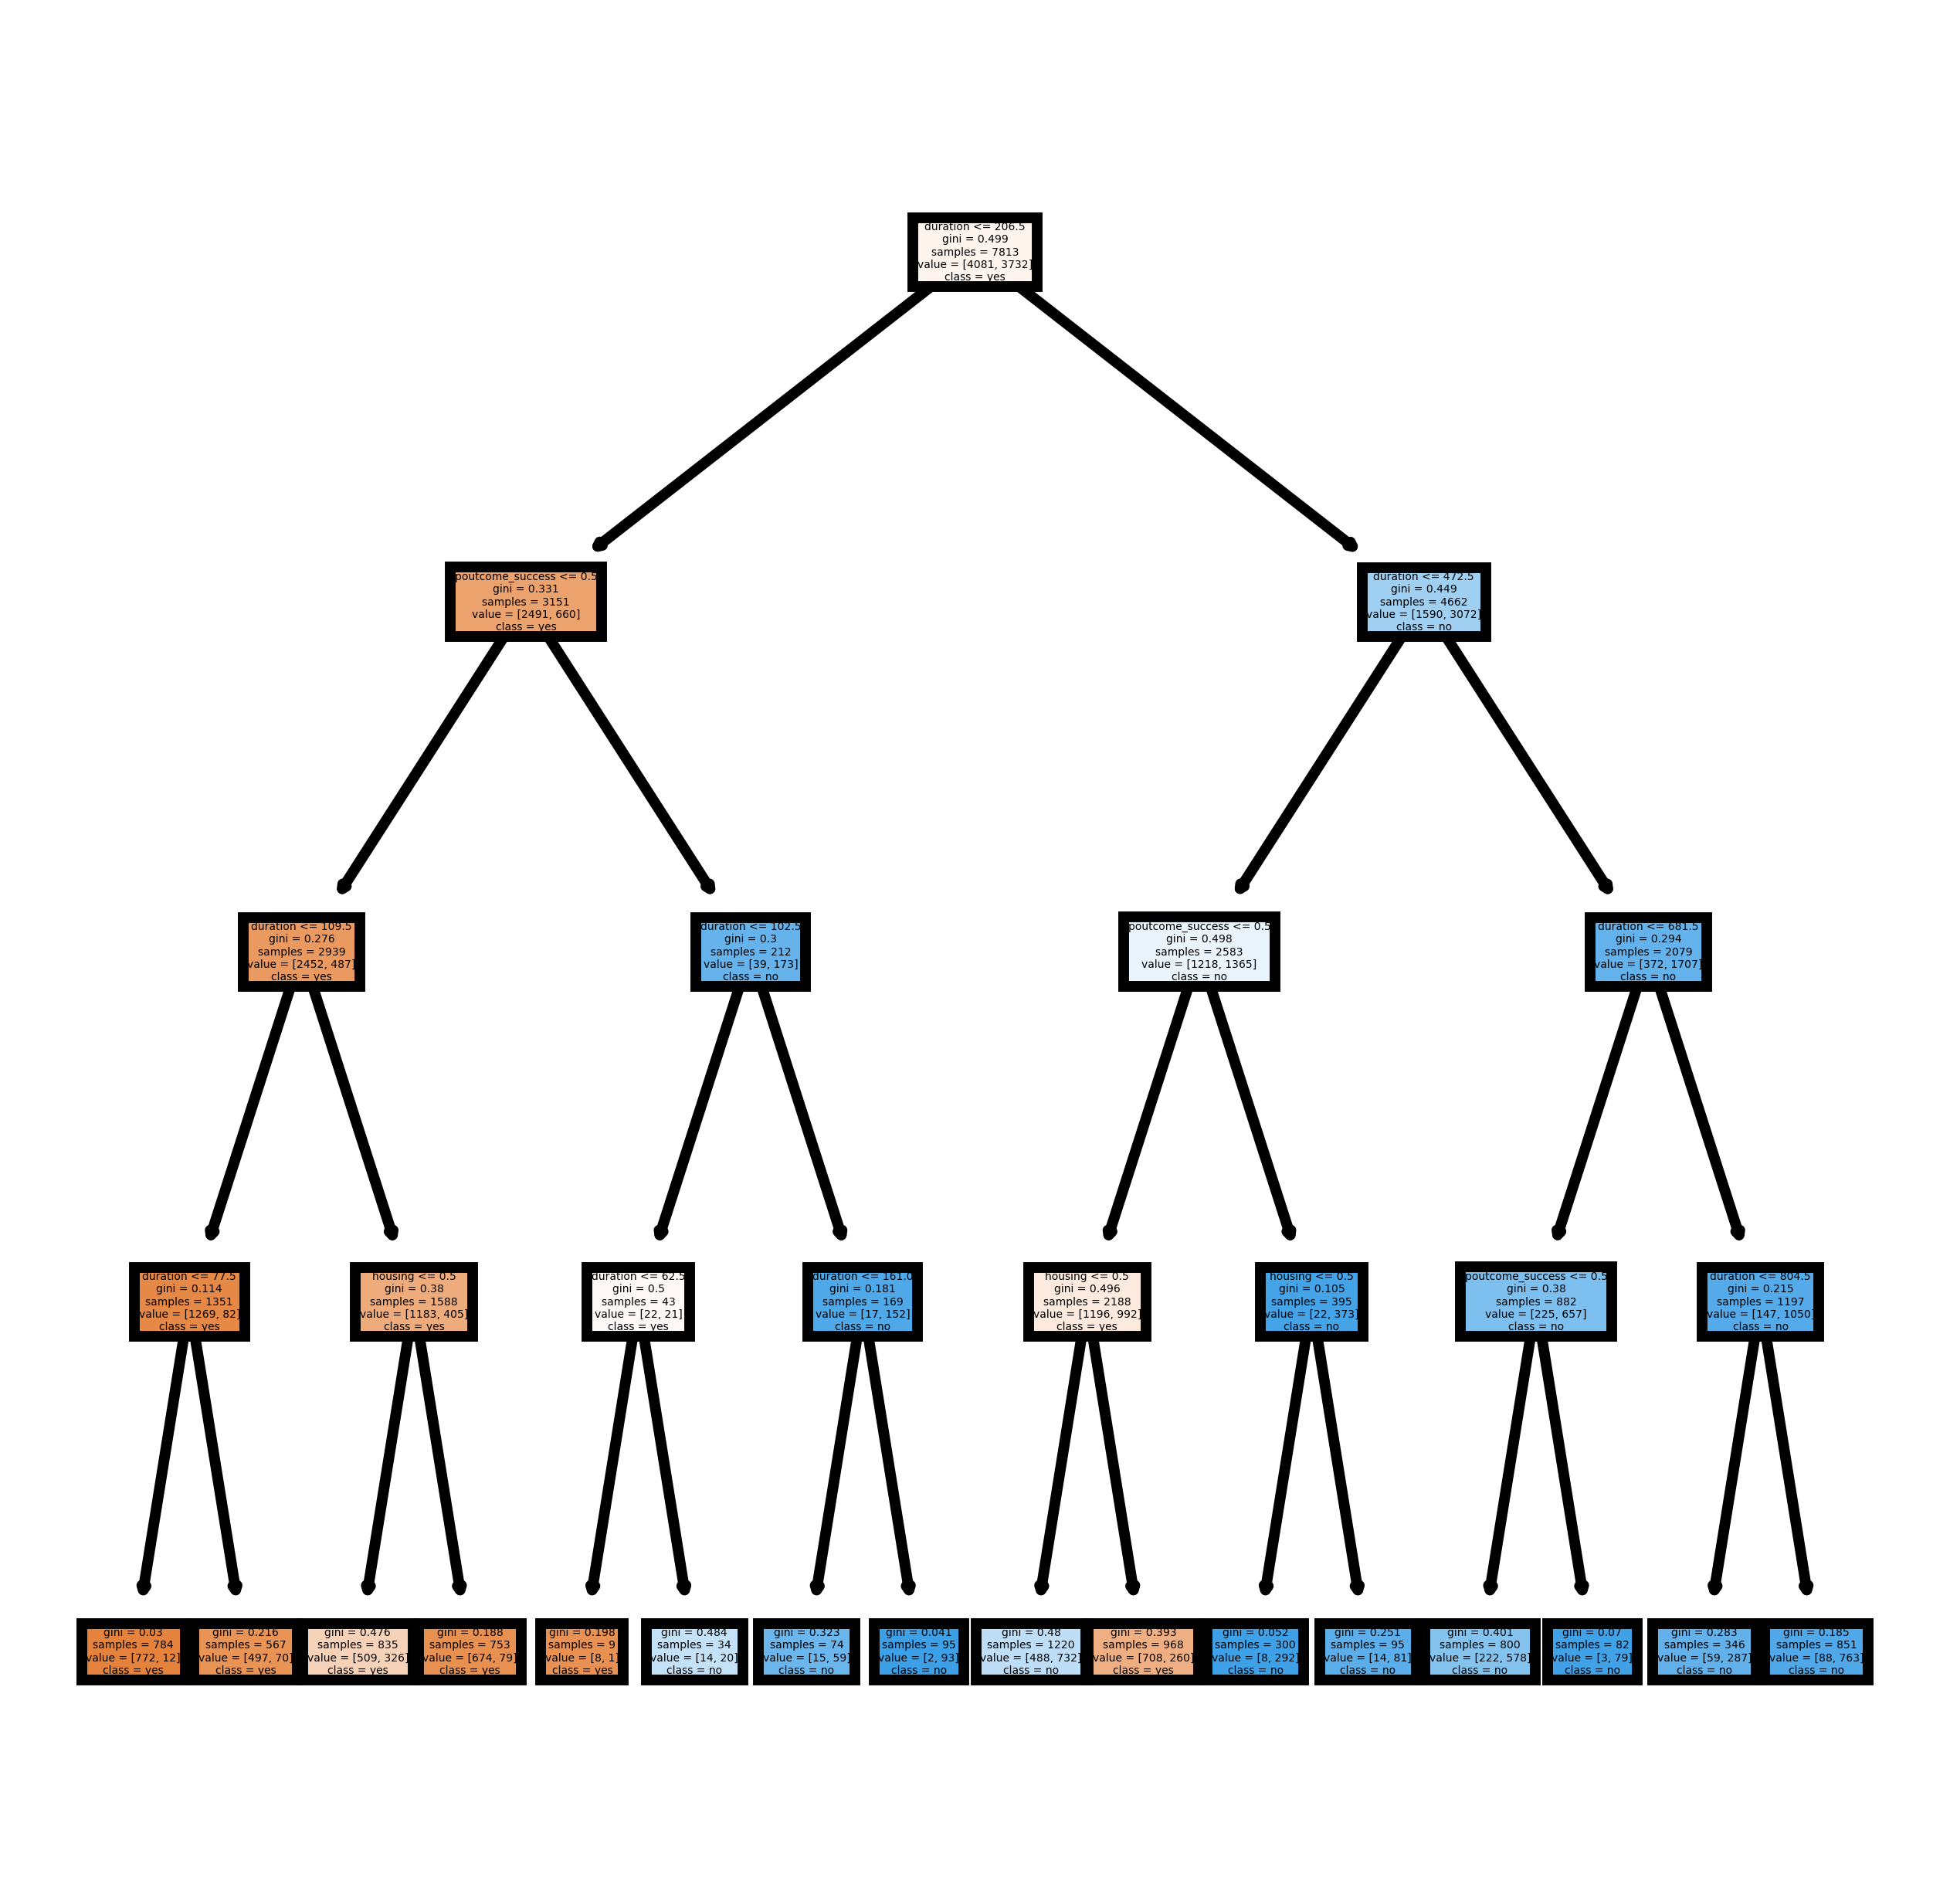

In [50]:
dt3=DecisionTreeClassifier(min_samples_split=500)
dt3.fit(x_train,y_train)
print("Train accuracy",dt3.score(x_train,y_train))
print("Test accuracy",dt3.score(x_test,y_test))

fn=x_train.columns

cn=["yes","no"]

# setting dpi = 300 to make image clearer than defalut
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=1000)

plot_tree(dt2,
          feature_names=fn,
          class_names=cn,
          filled=True);

In [51]:
dt4=DecisionTreeClassifier(min_samples_leaf=100)
dt4.fit(x_train,y_train)
print("Train accuracy",dt4.score(x_train,y_train))
print("Test accuracy",dt4.score(x_test,y_test))

Train accuracy 0.8154358121080251
Test accuracy 0.8002388772767991


In [52]:
dt4=DecisionTreeClassifier(max_depth=10)
dt4.fit(x_train,y_train)
print("Train accuracy",dt4.score(x_train,y_train))
print("Test accuracy",dt4.score(x_test,y_test))

Train accuracy 0.868680404454115
Test accuracy 0.7871006270528516


In [53]:
dt4=DecisionTreeClassifier(criterion="entropy")
dt4.fit(x_train,y_train)
print("Train accuracy",dt4.score(x_train,y_train))
print("Test accuracy",dt4.score(x_test,y_test))

Train accuracy 1.0
Test accuracy 0.7491788593610033


In [54]:
params={"criterion":["gini","entropy"],"max_depth":[5,7,9,11],
        "min_samples_split":[20,50,100,200],"min_samples_leaf":[5,10,15,30]}

In [55]:
dtg=DecisionTreeClassifier()
dt_grid=GridSearchCV(estimator=dtg,param_grid=params,cv=10,n_jobs=-1,verbose=2)

In [56]:
dt_grid.fit(x_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [5, 10, 15, 30],
                         'min_samples_split': [20, 50, 100, 200]},
             verbose=2)

In [57]:
dt_grid.param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 7, 9, 11],
 'min_samples_split': [20, 50, 100, 200],
 'min_samples_leaf': [5, 10, 15, 30]}

In [58]:
dt_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 10,
 'min_samples_split': 200}

In [59]:
dt_grid.best_score_

0.8089078530705274

In [60]:
dt_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       min_samples_split=200)

In [61]:
dt_after_grd=DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       min_samples_split=200)

In [62]:
dt_after_grd.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       min_samples_split=200)

In [63]:
print("Train accuracy",dt_after_grd.score(x_train,y_train))
print("Test accuracy",dt_after_grd.score(x_test,y_test))

Train accuracy 0.8250351977473441
Test accuracy 0.8038220364287847


In [64]:
dt_after_grd.feature_importances_

array([0.02490511, 0.04700083, 0.09736119, 0.00390275, 0.52021713,
       0.00613854, 0.03664543, 0.01447214, 0.00170119, 0.00270821,
       0.        , 0.00541615, 0.        , 0.00192274, 0.        ,
       0.00111785, 0.00372864, 0.00235362, 0.        , 0.0020546 ,
       0.        , 0.00390358, 0.        , 0.        , 0.00087672,
       0.17088701, 0.        , 0.00652565, 0.01353383, 0.02881166,
       0.00381542])

In [65]:
fn=x_train.columns
cn=["yes","no"]
fig,axes =plt.subplots(nrows =1,ncols=1,fig=(3,3),dpi=500)
plot_tree(dt_after_grd,feature_names=fn,class_names=cn,filled=True):

SyntaxError: invalid syntax (2141456219.py, line 4)

In [ ]:
x_train.columns


In [66]:
var_imp=pd.DataFrame({"var":x_train.columns,"imp":dt_after_grd.feature_importances_}).sort_values(by=["imp"],ascending=False)

In [67]:
var_imp

,var,imp
4,duration,0.520217
25,poutcome_success,0.170887
2,housing,0.097361
1,balance,0.047001
6,pdays,0.036645
29,quarter_q3,0.028812
0,age,0.024905
7,previous,0.014472
28,quarter_q2,0.013534
27,quarter_q1,0.006526


[]

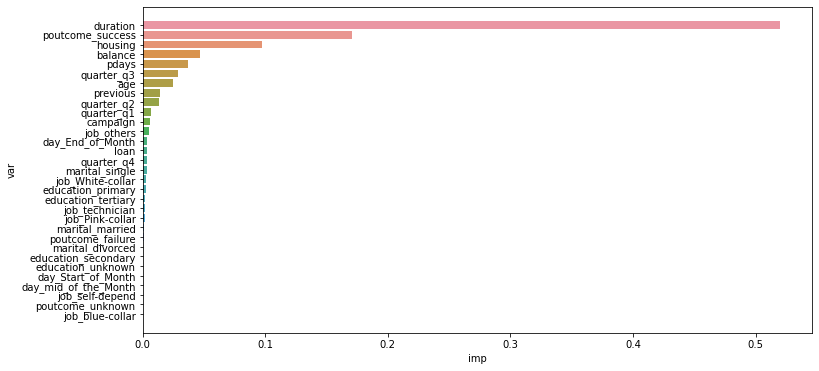

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(y="var",x="imp",data=var_imp)
plt.plot()

In [69]:
selected_var=var_imp[var_imp["imp"]>=0.006139]["var"].to_list()

In [70]:
x_train1=x_train[selected_var]
x_test1=x_test[selected_var]

In [71]:
dt_after_grd=DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       min_samples_split=200)
dt_after_grd.fit(x_train1,y_train)
print("Train accuracy",dt_after_grd.score(x_train1,y_train))
print("Test accuracy",dt_after_grd.score(x_test1,y_test))

Train accuracy 0.8241392550876744
Test accuracy 0.8032248432367871


In [72]:
x_train.shape

(7813, 31)

In [73]:
pred_y_train=dt_after_grd.predict(x_train1)
pred_y_test=dt_after_grd.predict(x_test1)

In [74]:
metrics.recall_score(y_train,pred_y_train)

0.8362808145766345

In [75]:
def my_classification_moodel(y_actual,y_pred,further_use=False):
    mt=metrics.confusion_matrix(y_actual,y_pred)
    recall_1=mt[1,1]/(mt[1,1]+mt[1,0])
    precision_1=mt[1,1]/(mt[1,1]+mt[0,1])
    f1_score_1=(2*recall_1*precision_1)/(precision_1+recall_1)
    Accuracy=(mt[1,1]+mt[0,0])/mt.sum()
    if further_use==True:
        return recall_1,precision_1,f1_score_1,Accuracy
    elif further_use==False:
        print(f"{recall_1},{precision_1},{f1_score_1},{Accuracy}")
        

In [76]:
mt=metrics.confusion_matrix(y_train,pred_y_train)
mtdf=pd.DataFrame(mt,columns=["pred_0","pred-1"],index=["act_0","act_1"])
mtdf

,pred_0,pred-1
act_0,3318,763
act_1,611,3121


In [77]:
my_classification_moodel(y_test,pred_y_test,further_use=False)

0.7996146435452793,0.782035175879397,0.7907272149888854,0.8032248432367871
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=200; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
print("Train Accuracy",rf.score(x_train,y_train))
print("Test Accuracy",rf.score(x_test,y_test))

Train Accuracy 1.0
Test Accuracy 0.8303971334726784


In [82]:
rf=RandomForestClassifier(n_estimators=300,max_depth=9,min_samples_split=100)
rf.fit(x_train,y_train)


print("Train Accuracy",rf.score(x_train,y_train))
print("Test Accuracy",rf.score(x_test,y_test))

Train Accuracy 0.8366824523230513
Test Accuracy 0.8184532696327261


In [86]:
params={
    "n_estimator": [100,150],
    "max_depth":[5,7,9]
    "min_samples_split" :[20,50],
    "min_samples_leaf" :[10,20],
    "bootstrap" :[True],
    "cristerion":["gini","entropy"]
}
rf1=RandomForestClassifier(random_state=0)
Grf=GridSearchCV(rf1,params_grid=params,cv=10,n_jobs=-1,verbose=1,
                scoring=["accuracy"])

grf.fit(x_train,y_train)

SyntaxError: invalid syntax (1846723750.py, line 4)